# Activity models

In [1]:
using Pkg, Revise
Pkg.activate("..")
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot

  Activating project at `~/Library/CloudStorage/OneDrive-ImperialCollegeLondon/University/UROP/SAFT_codes/Clapeyron`


PyPlot

In [24]:
revise(Clapeyron)

true

In this notebook, we will be giving examples on how to use activity models within `Clapeyron.jl`. We include examples of how one can customise their activity model and how it can be used in tangent with a cubic equation of state.

## MIAC of NaCl in water

Activity models cannot be used on their own; they provide us with an activity for a species in the mixture but, to obtain VLE properties from this, we need a saturation pressure. This can be obtained from any of the equations of state provided in `Clapeyron.jl` using the optional argument `puremodel`. We use the water + ethanol mixture as an example:

In [3]:
model = ESElectrolyte(["water08"],["sodium","chloride"])

ESElectrolyte{BasicIdeal, pharmaPCSAFT{BasicIdeal}, DH{ConstRSP}} with 3 components:
 "water08"
 "sodium"
 "chloride"

In [39]:
salts = [("NaCl",["sodium"=>1,"chloride"=>1])]
m = LinRange(1e-5,6,100)
z = molality_to_composition.(model, Ref(salts), m)

p = zeros(100)
vl = zeros(100)
γ = zeros(100)
y0 = nothing
vol0 = nothing
p0 = nothing
for i in 1:length(z)
    bub = bubble_pressure(model, 298.15, z[i], FugBubblePressure(nonvolatiles=["sodium","chloride"]))
    p[i] = bub[1]
    vl[i] = bub[2]
    vol0 = (bub[2], bub[3])
    γ[i] = mean_ionic_activity_coefficient(model,salts,298.15,m[i])[1]
end


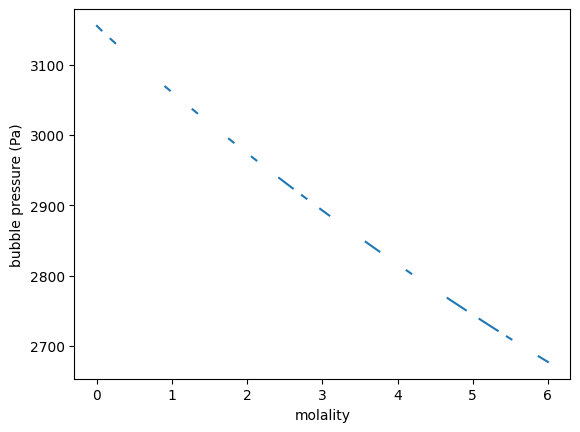

In [40]:
plt.clf()
plt.plot(m,p)
plt.xlabel("molality")
plt.ylabel("bubble pressure (Pa)")
display(plt.gcf())

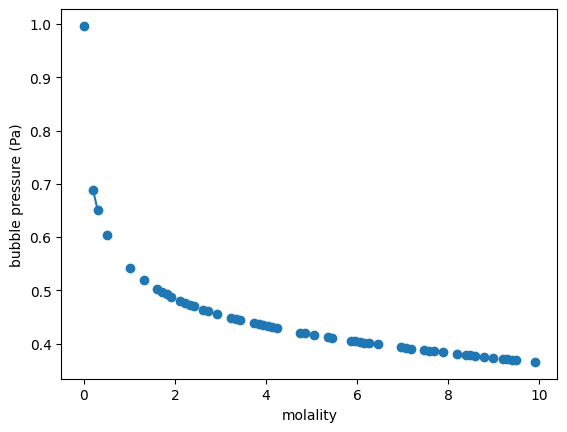

In [37]:
plt.clf()
plt.plot(m,γ,marker="o")
plt.xlabel("molality")
plt.ylabel("bubble pressure (Pa)")
display(plt.gcf())

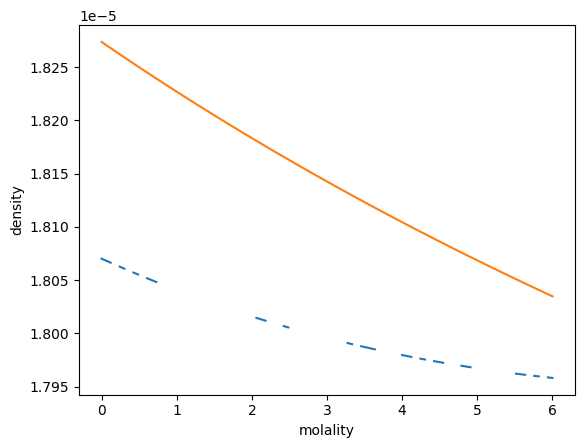

In [64]:
Mw = model.neutralmodel.params.Mw.values
mass = [sum(z[i].*Mw*1e-3) for i in 1:100]
vlb = [Clapeyron.lb_volume(model,z[i]) for i in 1:100]
plt.clf()
plt.plot(m,vl)
plt.plot(m,vlb.+1e-5)

plt.xlabel("molality")
plt.ylabel("density")
# plt.ylim(1000,1200)
display(plt.gcf())